In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import datetime, os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import linalg as LA
import cv2
from tqdm import tqdm

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('./input/boneage-training-dataset.csv')

In [4]:
belongs_to = np.ones(len(df['boneage']))
for k, age in tqdm(enumerate(df['boneage'])):
    if age <= 3:
        belongs_to[k] = 1
    elif age > 3  and  age <= 6:
        belongs_to[k] = 2
    elif age > 6  and  age <= 9:
        belongs_to[k] = 3
    elif age > 9  and  age <= 12:
        belongs_to[k] = 4
    elif age > 12  and  age <= 15:
        belongs_to[k] = 5
    elif age > 15  and  age <= 18:
        belongs_to[k] = 6
    elif age > 18  and  age <= 21:
        belongs_to[k] = 7
    elif age > 21  and  age <= 24:
        belongs_to[k] = 8
    elif age > 24  and  age <= 30:
        belongs_to[k] = 9
    elif age > 30  and  age <= 36:
        belongs_to[k] = 10
    elif age > 36  and  age <= 42:
        belongs_to[k] = 11
    elif age > 42  and  age <= 48:
        belongs_to[k] = 12
    elif age > 48  and  age <= 54:
        belongs_to[k] = 13
    elif age > 54  and  age <= 60:
        belongs_to[k] = 14
    elif age > 60  and  age <= 66:
        belongs_to[k] = 15
    elif age > 66  and  age <= 72:
        belongs_to[k] = 16
    elif age > 72  and  age <= 78:
        belongs_to[k] = 17
    elif age > 78  and  age <= 84:
        belongs_to[k] = 18
    elif age > 84  and  age <= 90:
        belongs_to[k] = 19
    elif age > 90  and  age <= 96:
        belongs_to[k] = 20
    elif age > 96  and  age <= 102:
        belongs_to[k] = 21
    elif age > 102  and  age <= 108:
        belongs_to[k] = 22
    elif age > 108  and  age <= 114:
        belongs_to[k] = 23
    elif age > 114  and  age <= 120:
        belongs_to[k] = 24
    elif age > 120  and  age <= 132:
        belongs_to[k] = 25
    elif age > 132  and  age <= 144:
        belongs_to[k] = 26
    elif age > 144  and  age <= 156:
        belongs_to[k] = 27
    elif age > 156  and  age <= 168:
        belongs_to[k] = 28
    elif age > 168  and  age <= 180:
        belongs_to[k] = 29
    elif age > 180  and  age <= 192:
        belongs_to[k] = 30
    elif age > 192  and  age <= 204:
        belongs_to[k] = 31
    elif age > 204  and  age <= 216:
        belongs_to[k] = 32

12611it [00:00, 547062.38it/s]


In [5]:
belongs_to

array([29.,  4., 20., ..., 14., 27., 25.])

In [6]:
df['belongs_to_group'] = belongs_to.tolist()

In [7]:
df['belongs_to_group'] = pd.to_numeric(df['belongs_to_group'], downcast='integer')

In [8]:
df.head(10)

,id,boneage,male,belongs_to_group
0,1377,180,False,29
1,1378,12,False,4
2,1379,94,False,20
3,1380,120,True,24
4,1381,82,False,18
5,1382,138,True,26
6,1383,150,True,27
7,1384,156,True,27
8,1385,36,True,10
9,1387,138,True,26


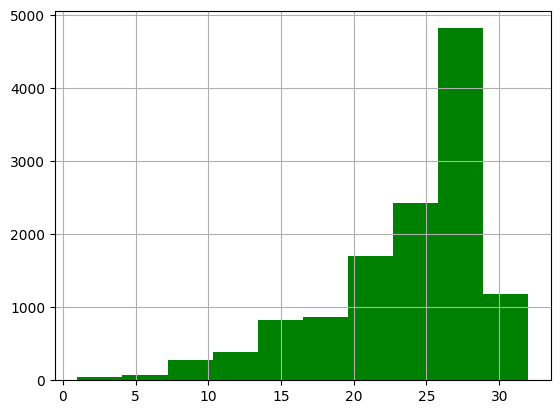

In [9]:
df['belongs_to_group'].hist(color = 'green')
plt.show()

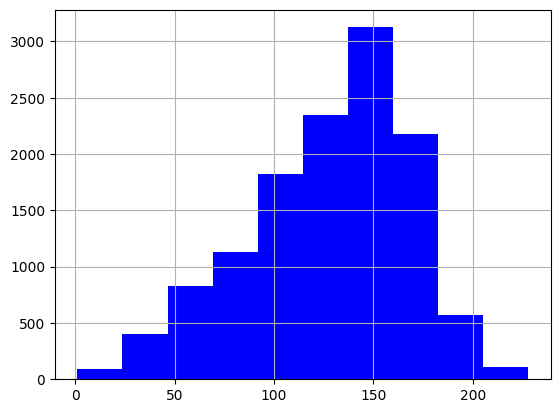

In [10]:
df['boneage'].hist(color = 'blue')
plt.show()

In [11]:
X = pd.get_dummies(df, columns=['male'], drop_first=True)
y = df['belongs_to_group']

In [12]:
X.head()

,id,boneage,belongs_to_group,male_True
0,1377,180,29,0
1,1378,12,4,0
2,1379,94,20,0
3,1380,120,24,1
4,1381,82,18,0


In [13]:
y[0]

29

In [14]:
# Get dataset RNSA

def get_dataset():
    #loading dataframes
    train_df = pd.read_csv('./input/boneage-training-dataset.csv')
    test_df = pd.read_csv('./input/boneage-test-dataset.csv')

    #appending file extension to id column for both training and testing dataframes
    train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png')
    test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 
    train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female')
    return train_df, test_df

In [15]:
train_df,_ = get_dataset()

In [16]:
DIR = './new_dataset'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))
length = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

11494


In [19]:
data_size = (128 * 128)
data = np.ones(length * data_size)
data = data.reshape((length, 128 , 128))
new_y = np.ones(length)
count = 0
cnt = -1
for filename, boneage in tqdm(list(train_df[['id','boneage']].values)):
    cnt += 1
    try:
        fname = './new_dataset/'+ filename
        img = cv2.imread(fname)
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128), interpolation = cv2.INTER_AREA)
        new_y[count] = y[cnt]
        data[count,:,:] = img.tolist()
        count += 1
    except Exception as ex:
        continue

100%|██████████| 12611/12611 [05:36<00:00, 37.50it/s]


In [20]:
c=data.reshape(length,-1)

In [22]:
new_y[13]

25.0

In [42]:
np.savetxt('128.txt', c, fmt='%d')

In [37]:
b = np.loadtxt('128.txt', dtype=int)

In [41]:
b.shape

(128, 128)

In [40]:
(a != b).sum()

0

In [21]:
c.shape

(11494, 16384)

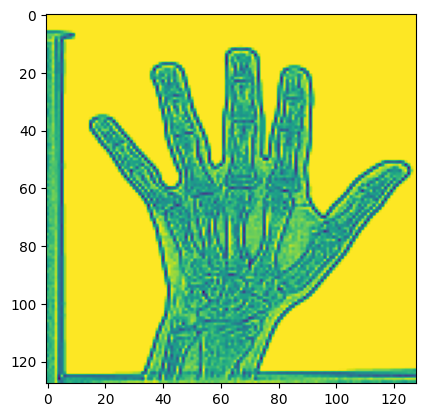

In [23]:
plt.imshow(c[13].reshape(128,128))
plt.show()

In [24]:
(trainX, testX, trainY, testY ) = train_test_split(c, new_y, test_size= 0.25, random_state=42)

In [25]:
testX

array([[ 26.,  30.,  14., ..., 103.,  90., 103.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ...,  91.,  91.,  51.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [227., 255., 245., ..., 148., 139., 131.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [26]:
df.iloc[8140]

id                  10613
boneage                94
male                False
belongs_to_group       20
Name: 8140, dtype: object

In [27]:
belongs_to[8140]

20.0

In [28]:
print(trainX.shape)
print(testX.shape)

(8620, 16384)
(2874, 16384)


In [29]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [30]:
y_pred = model.predict(testX)

In [73]:
y_pred

array([10., 26., 24., ..., 25., 27.,  6.])

In [31]:
testY

array([24., 28., 20., ..., 16., 18., 28.])

In [32]:
a = testX[0].reshape((128,128))

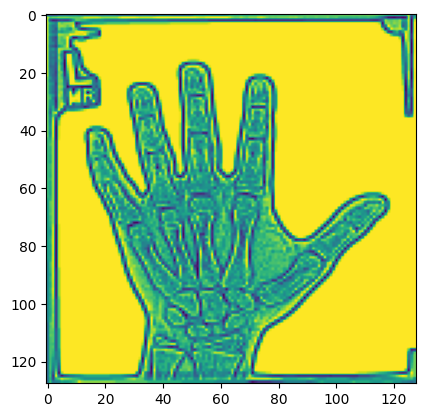

In [33]:
plt.imshow(a)
plt.show()

In [34]:
sum(y_pred == testY) / len(testY) * 100

9.464161447459986

In [79]:
accuracy_score(testY, y_pred)

0.06437021572720947

In [63]:
print(classification_report(testY, y_pred, labels = y.unique() ))

              precision    recall  f1-score   support

          29       0.07      0.02      0.03       218
           4       0.00      0.00      0.00         2
          20       0.01      0.02      0.02        86
          24       0.06      0.07      0.06       137
          18       0.00      0.00      0.00        36
          26       0.05      0.05      0.05       206
          27       0.26      0.19      0.22       687
          10       0.05      0.10      0.06        69
          25       0.05      0.04      0.04       184
          14       0.01      0.03      0.02        33
          30       0.06      0.01      0.01       137
           2       0.00      0.00      0.00         1
           8       0.03      0.07      0.04        29
          28       0.20      0.10      0.13       491
          22       0.08      0.12      0.09       180
           9       0.02      0.06      0.03        36
          17       0.00      0.00      0.00         8
          19       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
